# 1. **Introduction**

- **We Connect** is an independent network operator.  They provide high quality mobile communications services, like Multi IMSI based voice, data, VoIP and payment services. Their SIP Trunking services are based on Class 4 Career SIP Termination. 
- All services, both fixed (SIP) and mobile, are delivered worldwide through our white label model.  From our global coverage consisting of over 570 networks in more than 195 countries with guaranteed service at the best price. Weconnect is based in Alkmaar, and we have in addition to a complete service portfolio, a solid customer and partner base through the globe.
- The company has started facing high churn rate due to rapid development in technology and the emerging new competitors in the market.
- They have a detailed history of their customers and are looking for an automated solution to identify the likeliness of customer churning from using their services.


# 2. **Problem Statement**

- The company suffers from the following problems:

    --Due to the boom in the telecom industry with 4G technology, it has become a pain in the neck for the      company to retain their customers.
    --They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.
    --It is plausible for customers to choose 4G services over 3G services due to benefits of cost, speed, latency etc.
    --They have decided to find a more optimal way and hired a team of data scientists to solve this problem.
    --The task is to build a classification model using the dataset use the model to take further actions for preventing customers to churn.


# 3. **Installing and Importing Libraries**

In [ ]:
!pip install -q --upgrade pandas-profiling

In [167]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

# 4. **Data Acquisition & Description**

In [161]:

tel_train = pd.read_csv("Churn_train.csv")     # Importing data using pd.read_csv
tel_test = pd.read_csv("Churn_test.csv")

In [168]:
tel_train.shape

(5634, 21)

In [169]:
tel_test.shape

(1409, 20)

In [170]:
cust_id=tel_test.customerID# storing customer id data 

In [172]:
cust_id.count()

1409

In [173]:
tel_train.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75,No


## 4.1 **Data Information**

In [6]:
tel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


**Observation:-**
  -  There are no missing values in the entire data set
  -  There are 03 Numeric, 05 Boolean and 13 Categorical variables
  -  Each feature seems to have correct data type, except for the **TotalCharges** and **Churn** which needs to be changed

In [174]:
#Changing datatype of total charges to numeric
tel_train['TotalCharges']=pd.to_numeric(tel_train.TotalCharges, errors='coerce')
#Changing datatype of total charges to numeric
tel_test['TotalCharges']=pd.to_numeric(tel_test.TotalCharges, errors='coerce')

In [175]:
#Converting Churn to int with categorical data
tel_train['Churn'].replace("No",0,inplace=True)
tel_train['Churn'].replace("Yes",1,inplace=True)

## 4.2 **Data Description**

In [176]:
tel_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00000,5634.00000,5634.00000,5626.00000,5634.00000
mean,0.16187,32.27796,64.77913,2280.66238,0.26997
std,0.36837,24.55521,30.10499,2266.39462,0.44398
min,0.00000,0.00000,18.25000,18.80000,0.00000
25%,0.00000,9.00000,35.40000,391.90000,0.00000
50%,0.00000,29.00000,70.37500,1394.80000,0.00000
75%,0.00000,55.00000,89.85000,3794.48750,1.00000
max,1.00000,72.00000,118.65000,8684.80000,1.00000


In [179]:
tel_train.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,5634,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9840-DVNDC,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,2838,2932,3968,5087,2700,2479,2801,2498,2473,2781,2246,2213,3104,3321,1893


In [177]:
tel_train.skew() # checking the skewness in the data

SeniorCitizen     1.83645
tenure            0.24308
MonthlyCharges   -0.22349
TotalCharges      0.95462
Churn             1.03659
dtype: float64

- Senior Citizen is a highly skewed data 

In [178]:
tel_train.corr() # checking the correleation between variables

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.00000,0.02344,0.22523,0.10993,0.14197
tenure,0.02344,1.00000,0.25107,0.82800,-0.35189
MonthlyCharges,0.22523,0.25107,1.00000,0.65082,0.19681
TotalCharges,0.10993,0.82800,0.65082,1.00000,-0.19742
Churn,0.14197,-0.35189,0.19681,-0.19742,1.00000


- churn data is negatively corelated with tenure and total charges

In [12]:
tel_train.SeniorCitizen.value_counts()

0    4722
1     912
Name: SeniorCitizen, dtype: int64

**Observation:-**
    SeniorCitizen is a boolean data and is **highly skewed**
    Tenure is between 0-72 and looks to be norally distributed
    Monthly Charges is normally distributed with mean value of 64.7s

In [180]:
tel_train.isnull().sum()# checking for null values after typecasting

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

**Observations:-**
    Upon conversion of data types Total charges have 8 null values which needs to be imputed
    All columns now appear to have appropriate datatypes

In [181]:
#Imputing the null values
tel_train.TotalCharges.fillna(tel_train.TotalCharges.mean(),inplace=True)

In [182]:
#Imputing the null values
tel_test.TotalCharges.fillna(tel_test.TotalCharges.mean(),inplace=True)

In [183]:
tel_train.Churn.value_counts()

0    4113
1    1521
Name: Churn, dtype: int64

**Observation**
Data looks to be **imbalanced**

# 5. **Data Pre-Processing**
## 5.1 **Pre-Profiling Report**

In [184]:
profile = ProfileReport(df = tel_train)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


-**Observations**
- There are no missing or duplicate values in the dataset
- There are a large number of categorical and boolean values present
- Customer ID is a highly cardinal data
- Positive Corelation exist between monthly charges and total charges
- Negative Corelation exist between tenure and churn and churn and total charges

## 5.2 **Data handling**

- Making copy of data sets and dropping highly cardinal data

In [186]:
tel_train_copy= tel_train

In [187]:
tel_test_copy=tel_test

In [188]:
tel_train_copy.drop(['customerID'], axis = 1,inplace = True) #dropping the highly cardinal values.

In [190]:
tel_test_copy.drop(['customerID'], axis = 1,inplace = True) #dropping the highly cardinal values.

# 6. **EDA**

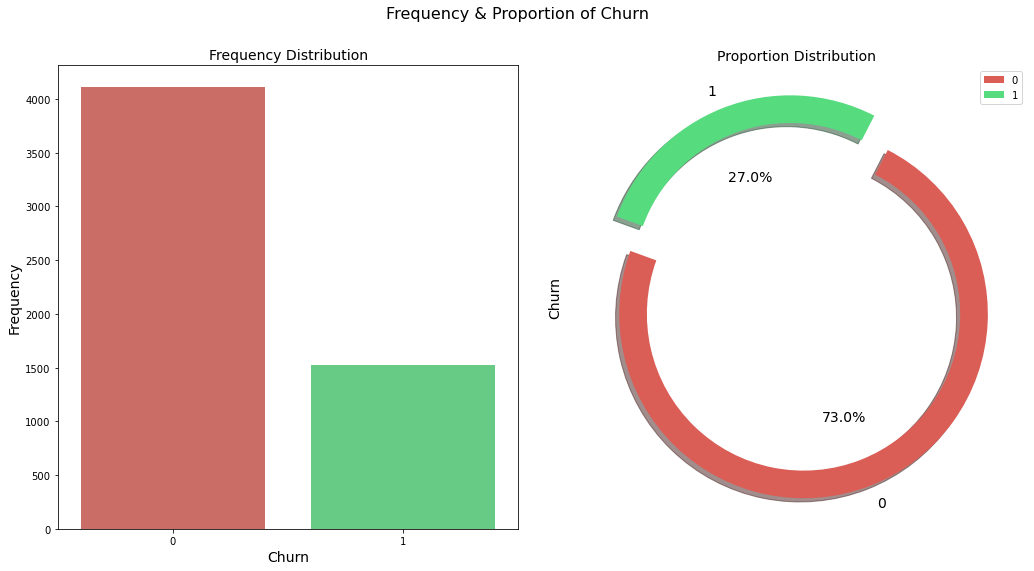

In [192]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'Churn', data = tel_train_copy, palette = ['#DB5E56','#56DB7F'])
plt.xlabel(xlabel = 'Churn', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
tel_train_copy['Churn'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#DB5E56','#56DB7F'])
#plt.legend(['Chu', 'Survived'])
plt.ylabel(ylabel = 'Churn', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Churn', y = 1.02, size = 16)
plt.show()

- Churn Data is highly imbalanced

In [194]:
def bivariate_plot(x_axis,y_axis):
  # Create a figure of 10 x 7 inches
  fig = plt.figure(figsize=(10, 7))

  # Plot a regression plot using sns.regplot between Engine_size and Price_in_thousands features.
  sns.regplot(data=tel_train_copy, x=x_axis, y=y_axis)

  # Set x, y labels of size 14, ticks of size 12 and title label of size 16.
  plt.ylabel(ylabel=x_axis, size=14)
  plt.xlabel(xlabel=y_axis, size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label=x_axis + ' vs ' + y_axis , size=16)

  # Put a grid
  plt.grid(b=True)

  # Display the plot
  plt.show()

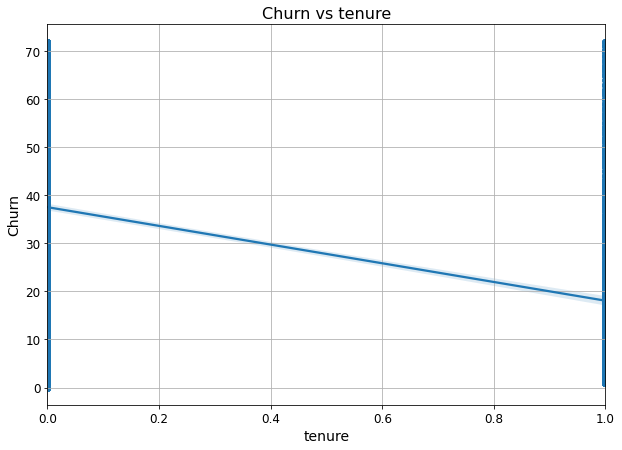

In [198]:
bivariate_plot('Churn','tenure')

- Negative corelation exists between tenure and churn

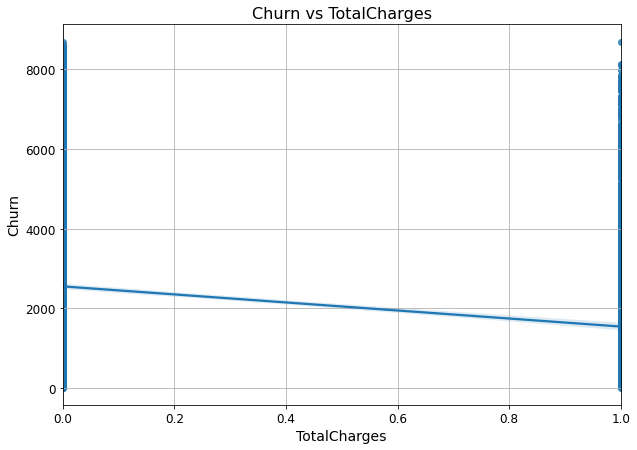

In [199]:
bivariate_plot('Churn','TotalCharges')

- Negative corelation exists between total charges and churn

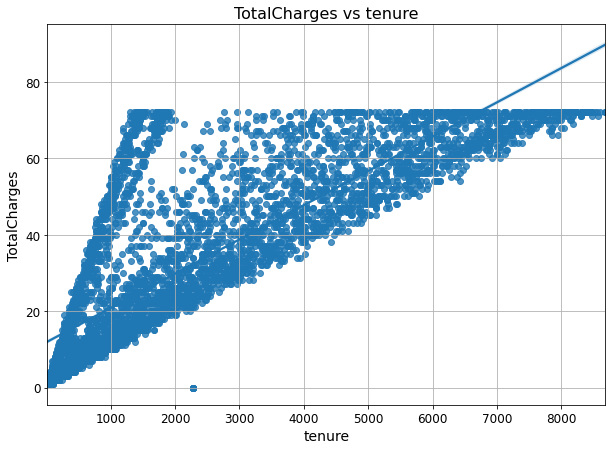

In [201]:
bivariate_plot('TotalCharges','tenure')

- Positive corelation exist between tenure and Total charges

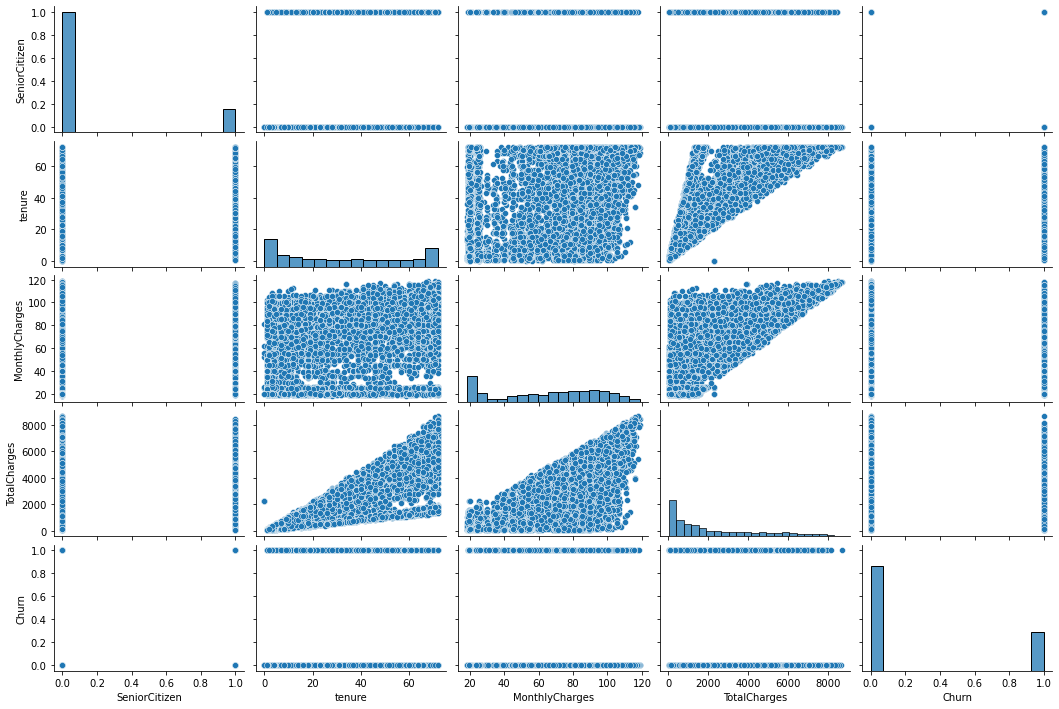

In [202]:
sns.pairplot(tel_train_copy, size = 2, aspect = 1.5)

Text(0.5, 1.0, 'Correlation between features')

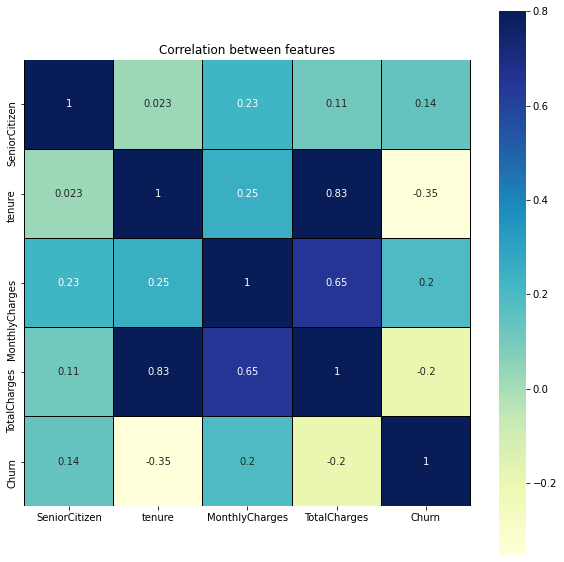

In [203]:
corr = tel_train_copy.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observations**
- Strong Positive Corelation exist between tenure and total charges
- Negative Corelation exist between tenure and churn and churn and total charges

In [204]:
encoded_data = pd.get_dummies(tel_train_copy) # encoding all the categorical variables
encoded_data.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,12,19.70000,258.35000,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
1,0,42,73.90000,3160.55000,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0
2,0,71,65.15000,4681.75000,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0


In [205]:
tel_test_encoded = pd.get_dummies(tel_test_copy) # encoding all the categorical variables
tel_test_encoded.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,41,79.85000,3320.75000,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0
1,1,66,102.40000,6471.85000,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0
2,0,12,45.00000,524.35000,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0


In [206]:
X=encoded_data# segregating the target and input variables

In [207]:
Y=X['Churn']

In [208]:
X.drop(['Churn'], axis = 1,inplace = True) #dropping the target column.

# 7 **Post Data Processing**

In [236]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.20, random_state=1)#creating the train and test data
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (4507, 45)
y_train shape:  (4507,)

Test cases as below
X_test shape:  (1127, 45)
y_test shape:  (1127,)


In [237]:
logreg = LogisticRegression()# training the model with test data
logreg.fit(X_train,y_train)

LogisticRegression()

In [238]:
pred = logreg.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,pred))

Accuracy score for test data is: 0.80301685891748


In [212]:
y_pred = logreg.predict(tel_test_encoded) # predicting the test data with actual test data set

In [221]:
ser=pd.Series(y_pred)

In [239]:
data = {'Customer ID':cust_id,
        'Churn':ser}
 
# Create DataFrame
df = pd.DataFrame(data)

In [241]:
df.to_csv('submission.csv', index=False, header=False)# exporting the submission file